#### 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 모든 행과 열을 확인하고 싶으면 다음의 주석을 해제하면 됩니다.
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

#### 데이터 불러오기

In [2]:
# 데이터 경로 지정
path_month_4 = "/Users/zaewoo/Downloads/서울시교통관련데이터/차량통행속도/2022년 4월 서울시 차량통행속도.xlsx"
path_month_5 = "/Users/zaewoo/Downloads/서울시교통관련데이터/차량통행속도/2022년 5월 서울시 차량통행속도.xlsx"

# 데이터 불러오기
df_month_4 = pd.read_excel(path_month_4)
df_month_5 = pd.read_excel(path_month_5)

#### 데이터 전처리

In [3]:
# 탐색 구간 지정

# 4월
df_month_4 = df_month_4.loc[((df_month_4["시점명"]=="한강대교남단교차로") &
                            (df_month_4["종점명"]=="한강대교북단교차로")) | 
                            ((df_month_4["시점명"]=="동작대교남단") &
                            (df_month_4["종점명"]=="동작대교북단")) |  
                            ((df_month_4["시점명"]=="반포대교남단") &
                            (df_month_4["종점명"]=="반포대교북단")) | 
                            ((df_month_4["시점명"]=="한남대교남단") & 
                            (df_month_4["종점명"]=="한남대교북단"))]

# 5월
df_month_5 = df_month_5.loc[((df_month_5["시점명"]=="한강대교남단교차로") &
                            (df_month_5["종점명"]=="한강대교북단교차로")) | 
                            ((df_month_5["시점명"]=="동작대교남단") &
                            (df_month_5["종점명"]=="동작대교북단")) |  
                            ((df_month_5["시점명"]=="반포대교남단") &
                            (df_month_5["종점명"]=="반포대교북단")) | 
                            ((df_month_5["시점명"]=="한남대교남단") & 
                            (df_month_5["종점명"]=="한남대교북단"))]

In [4]:
# 탐색 일자 지정
df_month_4 = df_month_4.loc[(df_month_4["일자"] > 20220419)]
df_month_5 = df_month_5.loc[(df_month_5["일자"] < 20220521)]

In [5]:
# 탐색 요일 지정
df_month_4 = df_month_4.loc[(df_month_4["요일"] != "토") & (df_month_4["요일"] != "일")]
df_month_5 = df_month_5.loc[(df_month_5["요일"] != "토") & (df_month_5["요일"] != "일")]

data = pd.concat([df_month_4, df_month_5])

In [6]:
# 탐색 구간 별 분석을 위하여 다음과 같이 분류하였습니다.

# 한강대교
hangang_month_4 = df_month_4[df_month_4["시점명"] == "한강대교남단교차로"]
hangang_month_5 = df_month_5[df_month_5["시점명"] == "한강대교남단교차로"]
hangang = pd.concat([hangang_month_4, hangang_month_5])

# 한강대교 - 탐색 시간 지정
hangang_month_4 = hangang_month_4[["08시", "09시", "10시"]]
hangang_month_5 = hangang_month_5[["08시", "09시", "10시"]]
hangang = hangang[["08시", "09시", "10시"]]

# 동작대교
dongjak_month_4 = df_month_4[df_month_4["시점명"] == "동작대교남단"]
dongjak_month_5 = df_month_5[df_month_5["시점명"] == "동작대교남단"]
dongjak = pd.concat([dongjak_month_4, dongjak_month_5])

# 동작대교 - 탐색 시간 지정
dongjak_month_4 = dongjak_month_4[["08시", "09시", "10시"]]
dongjak_month_5 = dongjak_month_5[["08시", "09시", "10시"]]
dongjak = dongjak[["08시", "09시", "10시"]]

# 반포대교
banpo_month_4 = df_month_4[df_month_4["시점명"] == "반포대교남단"]
banpo_month_5 = df_month_5[df_month_5["시점명"] == "반포대교남단"]
banpo = pd.concat([banpo_month_4, banpo_month_5])

# 반포대교 - 탐색 시간 지정
banpo_month_4 = banpo_month_4[["08시", "09시", "10시"]]
banpo_month_5 = banpo_month_5[["08시", "09시", "10시"]]
banpo = banpo[["08시", "09시", "10시"]]

# 한남대교
hannam_month_4 = df_month_4[df_month_4["시점명"] == "한남대교남단"]
hannam_month_5 = df_month_5[df_month_5["시점명"] == "한남대교남단"]
hannam = pd.concat([hannam_month_4, hannam_month_5])

# 한남대교 - 탐색 시간 지정
hannam_month_4 = hannam_month_4[["08시", "09시", "10시"]]
hannam_month_5 = hannam_month_5[["08시", "09시", "10시"]]
hannam = hannam[["08시", "09시", "10시"]]

# 잠수교
# jamsu_month_4 = df_month_4.loc[df_month_4["지점명"] == "잠수교"]
# jamsu_month_5 = df_month_5.loc[df_month_5["지점명"] == "잠수교"]
# jamsu = pd.concat([jamsu_month_4, jamsu_month_5])

# 잠수교 - 탐색 시간 지정
# jamsu_month_4 = jamsu_month_4[["8시", "9시", "10시"]]
# jamsu_month_5 = jamsu_month_5[["8시", "9시", "10시"]]
# jamsu = hangang[["8시", "9시", "10시"]]

In [14]:
# 탐색 시간 지정
data = data[["08시", "09시", "10시"]]
df_month_4 = df_month_4[["08시", "09시", "10시"]]
df_month_5 = df_month_5[["08시", "09시", "10시"]]

#### 결과 확인

In [15]:
# 전체 데이터의 결과 수치 확인
print(data.mean())
print(df_month_4.mean())
print(df_month_5.mean())

08시    43.054457
09시    35.636630
10시    38.232609
dtype: float64
08시    42.061250
09시    34.160938
10시    37.095312
dtype: float64
08시    43.584167
09시    36.423667
10시    38.839167
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


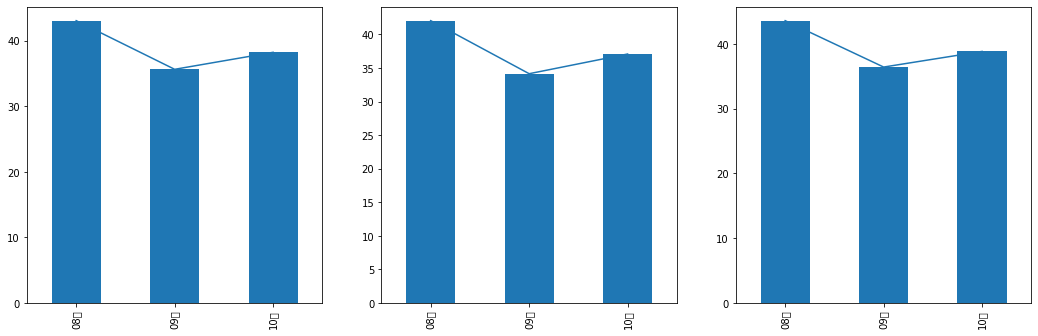

In [16]:
# 전체 데이터의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(data.mean())
print(data.mean().plot.bar())
plt.subplot(232)
plt.plot(df_month_4.mean())
print(df_month_4.mean().plot.bar())
plt.subplot(233)
plt.plot(df_month_5.mean())
print(df_month_5.mean().plot.bar())

In [17]:
# 한강대교의 결과 수치 확인
print(hangang_month_4.mean())
print(hangang_month_5.mean())
print(hangang.mean())

08시    22.42250
09시    13.75375
10시    15.75625
dtype: float64
08시    23.015333
09시    16.160667
10시    17.034667
dtype: float64
08시    22.809130
09시    15.323478
10시    16.590000
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


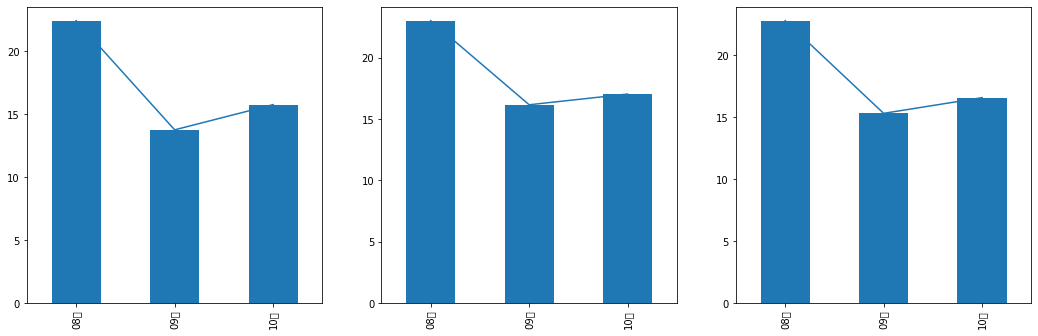

In [18]:
# 한강대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(hangang_month_4.mean())
print(hangang_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(hangang_month_5.mean())
print(hangang_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(hangang.mean())
print(hangang.mean().plot.bar())

In [19]:
# 동작대교의 결과 수치 확인
print(dongjak_month_4.mean())
print(dongjak_month_5.mean())
print(dongjak.mean())

08시    57.92750
09시    56.61125
10시    56.82125
dtype: float64
08시    60.571333
09시    58.518667
10시    58.980667
dtype: float64
08시    59.651739
09시    57.855217
10시    58.229565
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


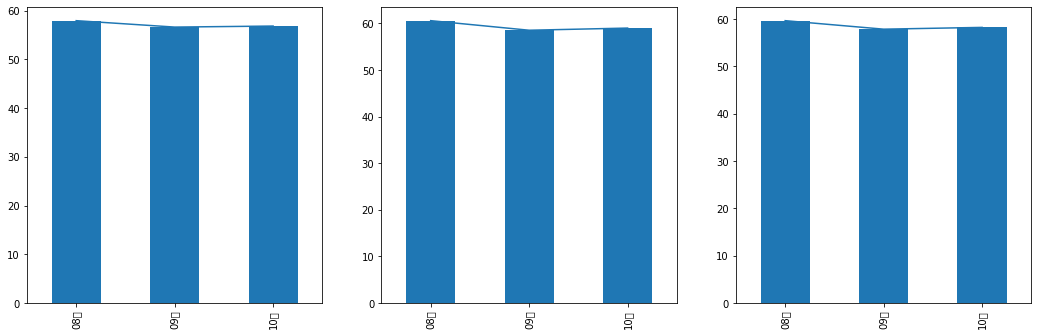

In [20]:
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(dongjak_month_4.mean())
print(dongjak_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(dongjak_month_5.mean())
print(dongjak_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(dongjak.mean())
print(dongjak.mean().plot.bar())

In [21]:
# 반포대교의 결과 수치 확인
print(banpo_month_4.mean())
print(banpo_month_5.mean())
print(banpo.mean())

08시    50.49500
09시    46.44875
10시    48.85000
dtype: float64
08시    51.240000
09시    47.119333
10시    48.034000
dtype: float64
08시    50.980870
09시    46.886087
10시    48.317826
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


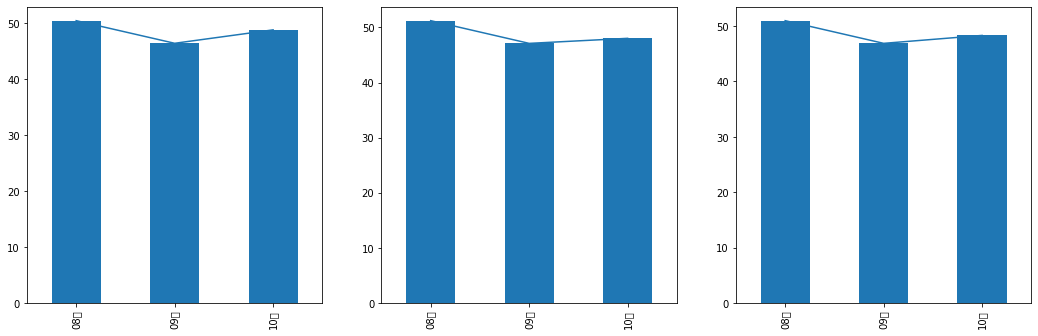

In [22]:
# 반포대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(banpo_month_4.mean())
print(banpo_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(banpo_month_5.mean())
print(banpo_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(banpo.mean())
print(banpo.mean().plot.bar())

In [23]:
# 한남대교의 결과 확인
print(hannam_month_4.mean())
print(hannam_month_5.mean())
print(hannam.mean())

08시    37.40000
09시    19.83000
10시    26.95375
dtype: float64
08시    39.510000
09시    23.896000
10시    31.307333
dtype: float64
08시    38.776087
09시    22.481739
10시    29.793043
dtype: float64


AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)


/Users/zaewoo/miniforge3/envs/workspace/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


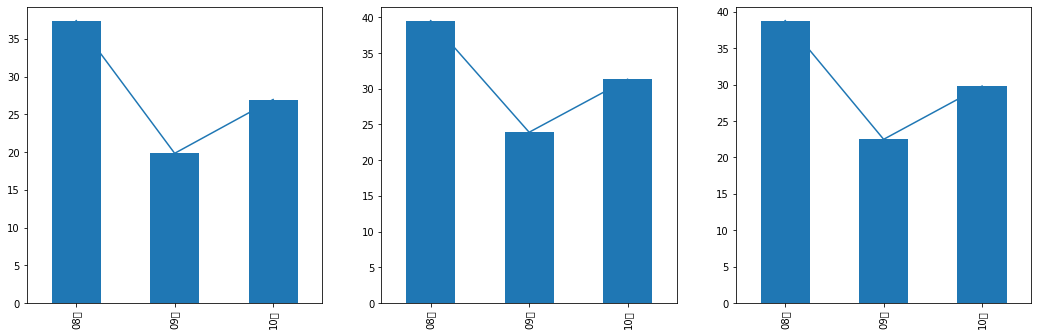

In [24]:
# 한남대교의 결과 그래프 확인
plt.figure(figsize=(18, 12))
plt.subplot(231)
plt.plot(hannam_month_4.mean())
print(hannam_month_4.mean().plot.bar())
plt.subplot(232)
plt.plot(hannam_month_5.mean())
print(hannam_month_5.mean().plot.bar())
plt.subplot(233)
plt.plot(hannam.mean())
print(hannam.mean().plot.bar())